# Stat project 2

## Задание

1. Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.
2. Постройте график распределения числа показов (Impressions) для каждой рекламы, прологарифмировав значения.
3. Создайте новую колонку c CTR. Посмотрите на описательные статистики и распределение.
4. Проанализируйте CTR с разбивкой по рекламной кампании.
5. Посчитайте стоимость за клик пользователя по объявлению (CPC). Изучите полученные значения, используя меры центральной тенденции и меры изменчивости. 
6. Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления. 
7. Посчитайте конверсию из клика в покупку.

## Описание данных
- ad_id – идентификатор объявления (рекламы)
- xyz_campaign_id – идентификатор рекламной кампании в базе компании X
- fb_campaign_id – идентификатор кампании в Facebook
- age – возрастная группа, которой показывалась реклама
- gender – пол тех, кому показывалась реклама
- interest –код, указывающий категорию, к которой относится интерес пользователя (соответствие число – интерес, условно: 1 животные, 2 – автомобили, 3 – тортики и т.д.)
- impressions – число показов
- clicks – число кликов
- spent – сумма, которую компания потратила на показ объявления 
- total_conversion – количество людей, которые заинтересовались продуктом после просмотра рекламы
- approved_conversion – количество людей, которые купили продукт после просмотра рекламы

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import mode
from scipy.stats import iqr

In [2]:
# таблица с уникальными идентификаторами пользователей
df = pd.read_csv('./conversion.csv')

In [3]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [4]:
#отформатируем названия 
rename_columns = {}
for col in df.columns:
    rename_columns[col] = col.lower()

In [5]:
rename_columns

{'ad_id': 'ad_id',
 'xyz_campaign_id': 'xyz_campaign_id',
 'fb_campaign_id': 'fb_campaign_id',
 'age': 'age',
 'gender': 'gender',
 'interest': 'interest',
 'Impressions': 'impressions',
 'Clicks': 'clicks',
 'Spent': 'spent',
 'Total_Conversion': 'total_conversion',
 'Approved_Conversion': 'approved_conversion'}

In [6]:
df = df.rename(columns=rename_columns)
df.head(2)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0


In [7]:
#размер таблицы
df.shape

(1143, 11)

In [8]:
#тип данных
df.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
impressions              int64
clicks                   int64
spent                  float64
total_conversion         int64
approved_conversion      int64
dtype: object

In [9]:
#кол-во пропусков
df.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
impressions            0
clicks                 0
spent                  0
total_conversion       0
approved_conversion    0
dtype: int64

# Задание 1
Сколько уникальных рекламных кампаний было проведено? 

Note: использовать идентификатор кампании в базе Х – xyz_campaign_id.

In [10]:
#уникальные значение
df.xyz_campaign_id.unique()

array([ 916,  936, 1178], dtype=int64)

In [11]:
#кол-во уникальных значений
df.xyz_campaign_id.nunique()

3

# Задание 2
Посмотрите на данные и их описание. Соотнесите названия переменных с соответствующим типом данных.

- age  - Ранговая/порядковая переменная                  
- gender - номинативная/категориальная переменная                  
- interest - номинативная/категориальная переменная              
- impressions - дискретная переменная       
- clicks  - дискретная переменная                 
- spent  - непрерывная переменная             
- total_conversion - дискретная переменная        
- approved_conversion  - дискретная переменная   

# Задание 3
Постройте график распределения числа показов (Impressions – сколько раз пользователи увидели данное объявление) для каждой рекламной кампании в Facebook, прологарифмировав значения. Выберите верные утверждения:

Hint: np.log()

In [12]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

<Axes: xlabel='impressions', ylabel='Count'>

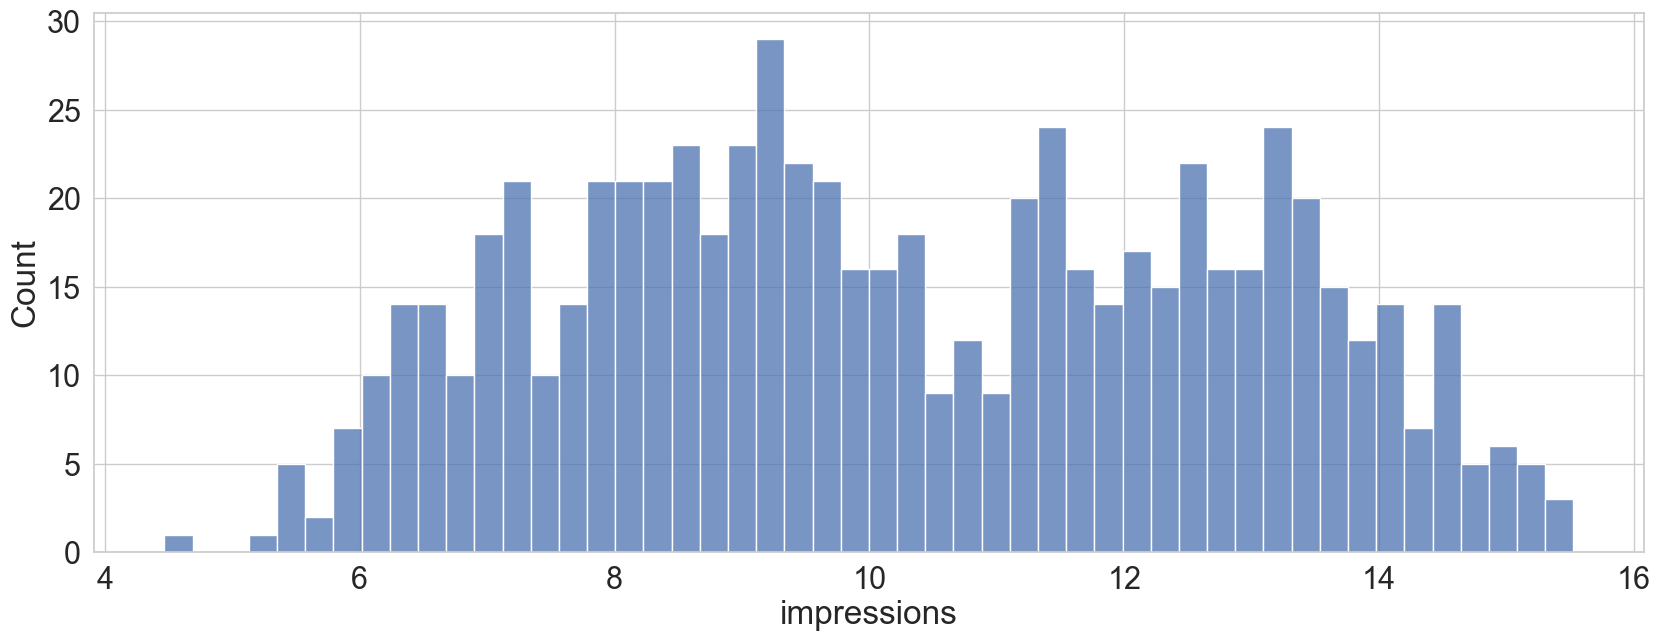

In [13]:
#рисуем гистограмму
sns.histplot(np.log(df.groupby('fb_campaign_id').impressions.sum()), kde=False, bins=50)

### Заметка: 
- полученное распределение **не является** нормальным
- распределение **бимодальное**

In [14]:
df_1 = df.groupby(['xyz_campaign_id', 'fb_campaign_id'], as_index=False).impressions.sum()
df_1['impressions'] = np.log(df_1['impressions'])
df_1['xyz_campaign_id'] = df_1['xyz_campaign_id'].astype('str')
df_1.head()

,xyz_campaign_id,fb_campaign_id,impressions
0,916,103916,8.902456
1,916,103917,9.790375
2,916,103920,6.541030
3,916,103928,9.035034
4,916,103929,7.557473


<Axes: xlabel='impressions', ylabel='Count'>

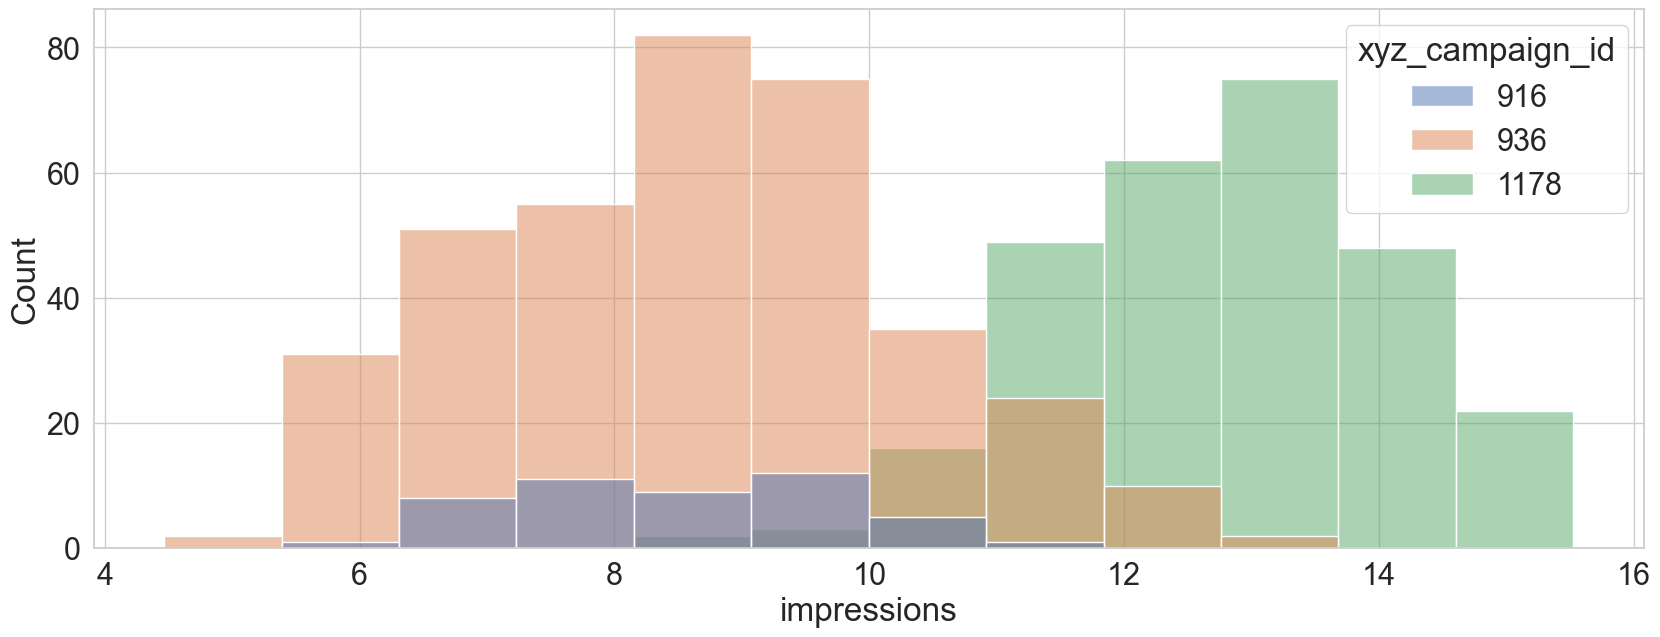

In [15]:
sns.histplot(data=df_1, x='impressions', hue='xyz_campaign_id')

# Задание 4

Теперь посчитаем ещё несколько полезных метрик. 
Первая – CTR (click-through rate), которая показывает кликабельность, т.е. отношение числа кликов к количеству показов.

In [16]:
df['ctr'] = df.clicks / df.impressions

In [17]:
df.ctr.describe()

count    1143.000000
mean        0.000164
std         0.000115
min         0.000000
25%         0.000100
50%         0.000160
75%         0.000234
max         0.001059
Name: ctr, dtype: float64

Укажите ad_id объявления с наибольшим CTR

In [18]:
df[df.ctr == df.ctr.max()]

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,impressions,clicks,spent,total_conversion,approved_conversion,ctr
150,738637,936,109857,45-49,F,24,944,1,1.42,1,0,0.001059


In [19]:
df.set_index('ad_id').ctr.idxmax()

738637

# Задание 5

Визуализируйте CTR с разбивкой по номеру рекламной кампании (xyz_campaign_id). Какому графику соответствует распределение CTR кампании 916?

<Axes: xlabel='ctr', ylabel='Count'>

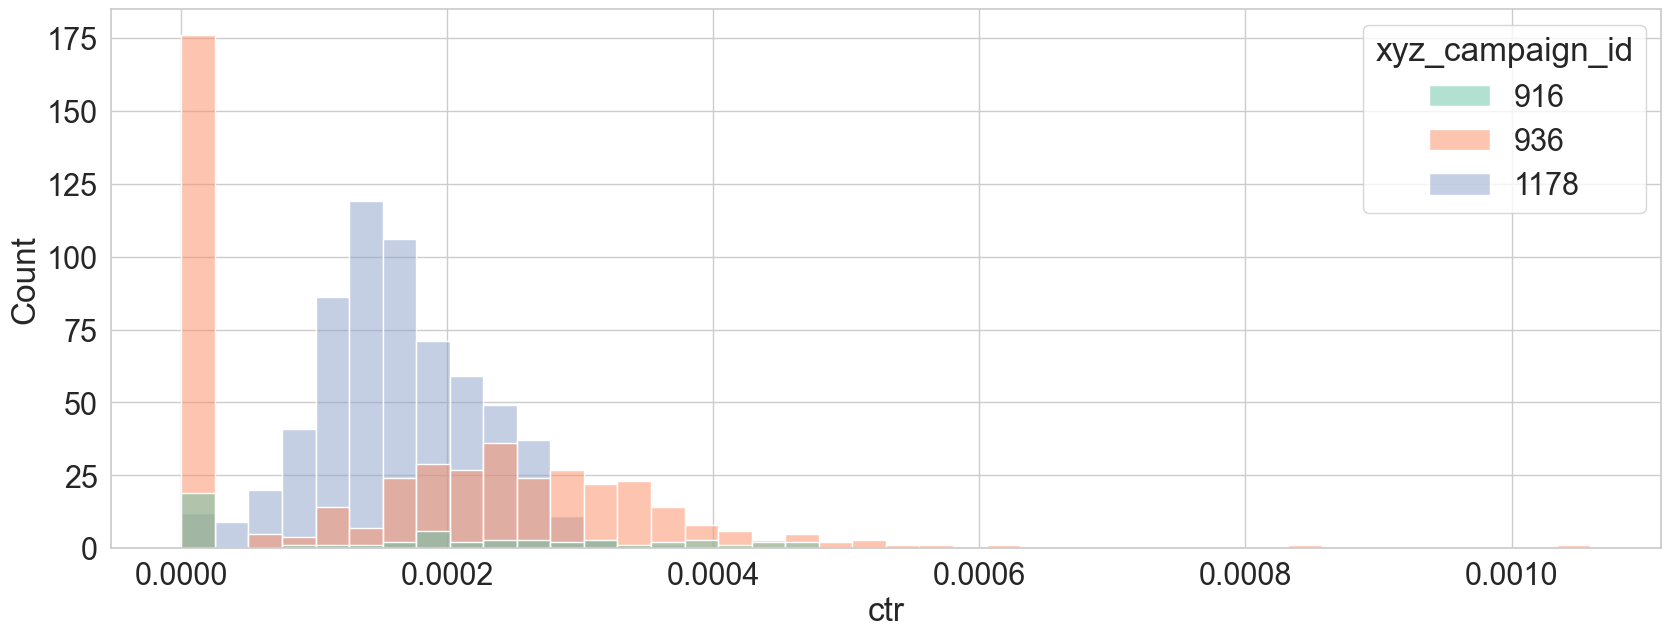

In [20]:
sns.histplot(data=df, x='ctr', hue = 'xyz_campaign_id', palette='Set2')

**Распределение CTR кампании 916**

<Axes: xlabel='ctr', ylabel='Count'>

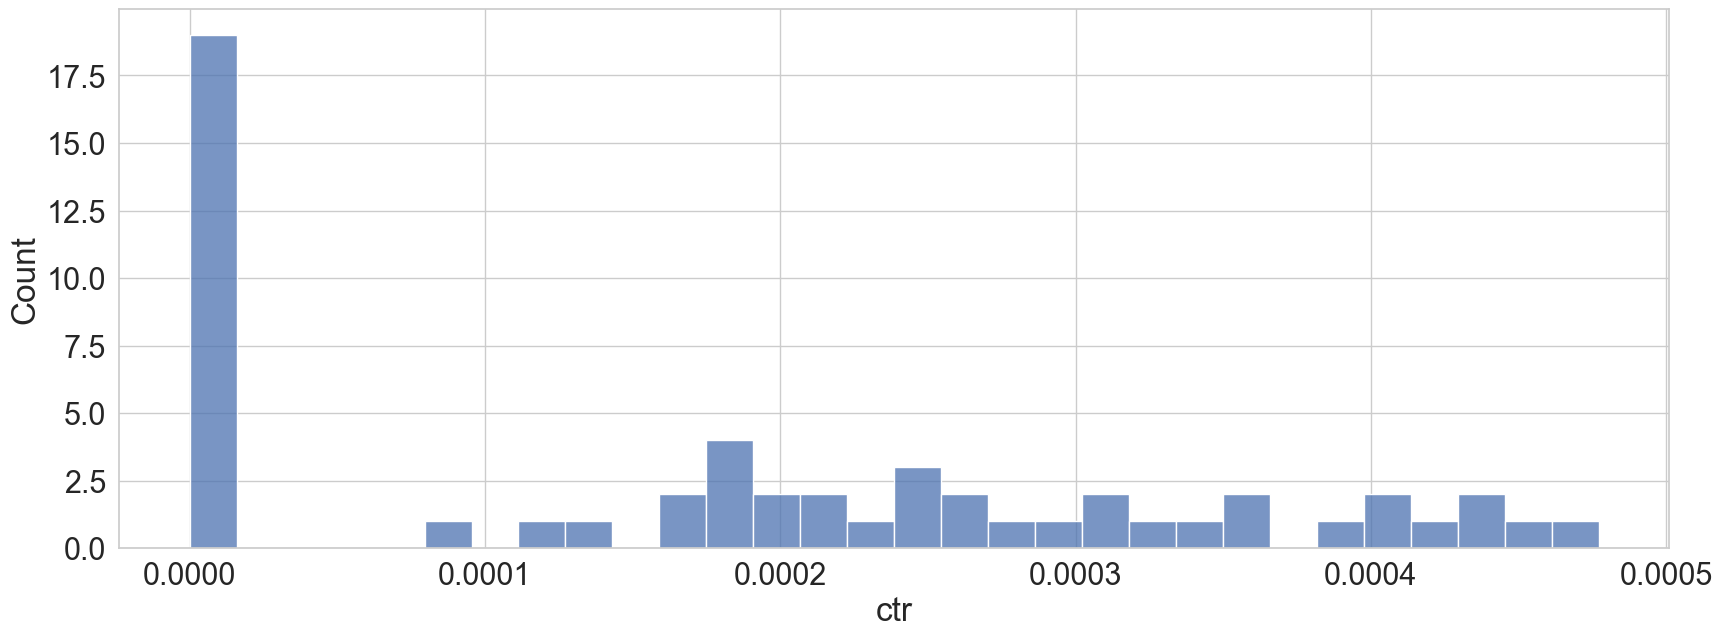

In [21]:
sns.histplot(x=df.query("xyz_campaign_id == 916").ctr, bins=30)

# Задание 6
Выведите описательные статистики для новой переменной, посмотрите на форму распределения. В ответе укажите межквартильный размах, округленный до двух знаков после точки.

Обратите внимание, что в столбце могут встретиться NaN. Если вы используете функцию iqr из scipy, то следует указать аргумент nan_policy='omit', чтобы их проигнорировать. При построении графика необходимо использовать метод .dropna().

**Заметка:**
CPC (cost-per-click) – стоимость за клик пользователя по объявлению. 
- Рассчитывается путём деления суммы потраченных денег на общее число кликов

In [22]:
df['cpc'] = (df.spent / df.clicks)

In [23]:
df.cpc.describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: cpc, dtype: float64

In [24]:
#загружаем: from scipy.stats import iqr

In [25]:
round(iqr(df.cpc, nan_policy='omit'), 2)

0.25

#### Второй вариант

In [26]:
df.cpc.isna().sum()

207

In [27]:
df_1 = df.dropna()

In [28]:
round(np.percentile (df_1.cpc, 75) - np.percentile (df_1.cpc, 25), 2)

0.25

# Задание 7

Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления. Какой график получился?
Чтобы избежать появление ошибки, можно указать .dropna() при построении графика. Обратите внимание, что удалять NaN из самого датасета не нужно, только для визуализации. 

C:\Users\Ann Zalivatskaya\AppData\Local\Temp\ipykernel_33968\23118577.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.query("gender == 'M'").cpc.dropna())
C:\Users\Ann Zalivatskaya\AppData\Local\Temp\ipykernel_33968\23118577.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.query("ge

<Axes: xlabel='cpc', ylabel='Density'>

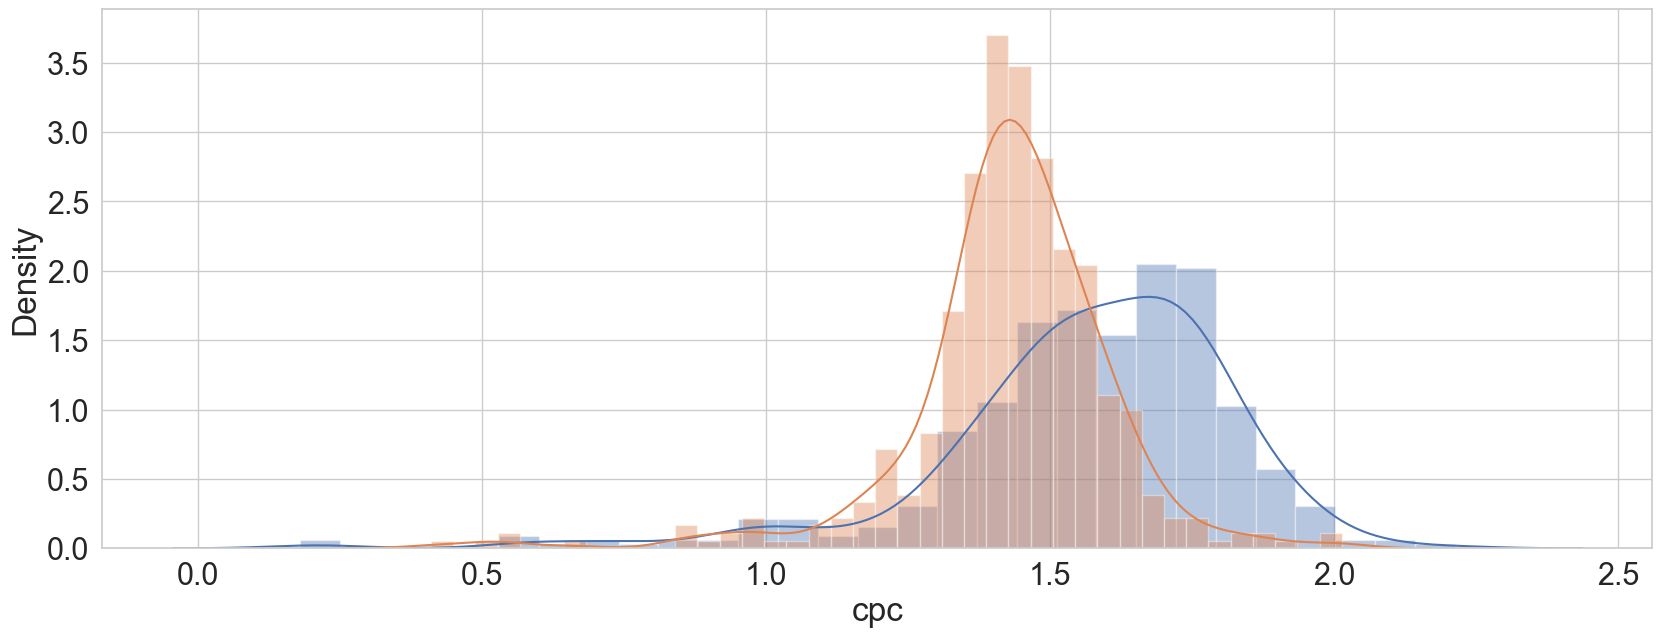

In [29]:
sns.distplot(df.query("gender == 'M'").cpc.dropna())
sns.distplot(df.query("gender == 'F'").cpc.dropna())

<Axes: xlabel='cpc', ylabel='Count'>

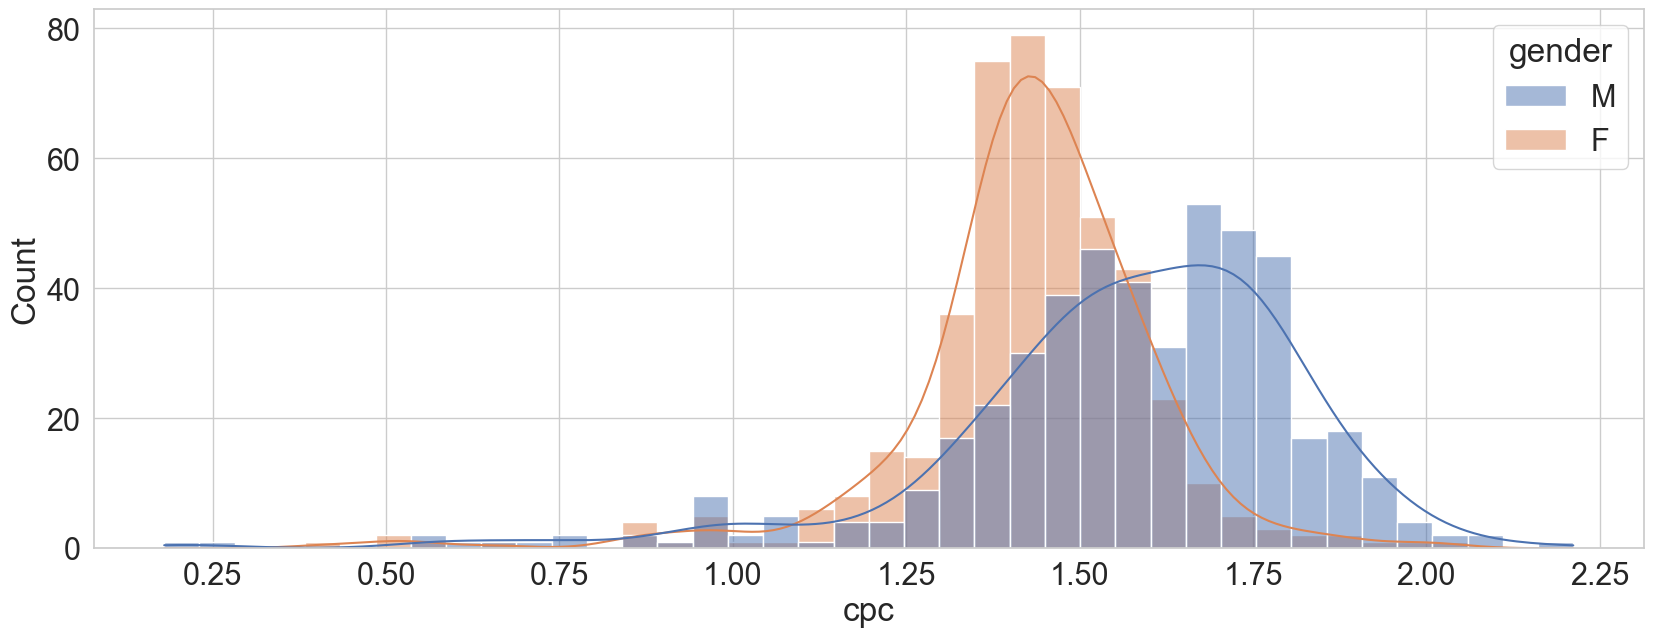

In [30]:
sns.histplot(data=df, x='cpc', hue='gender', kde=True)

# Задание 8
**Конверсия (conversion rate)** – отношение числа пользователей, совершивших целевое действие на определенном этапе, к общему числу тех, кто дошел до данного этапа.

Посчитайте конверсию из клика в покупку. В качестве ответа укажите конверсию для объявления 1121814 в процентах, округлив значение до 2 знаков после точки. Например, если значение кликов равно 10, а покупок – 2, то CR на данном этапе составляет 2/10=0.2=20.

**Note:** клики – Clicks, покупки – Approved_Conversion.

In [31]:
df['conv_rate'] = ((df.approved_conversion / df.clicks).mul(100))

In [32]:
df.query("ad_id == 1121814").conv_rate.round(2)

860    3.09
Name: conv_rate, dtype: float64